In [1]:
import pandas
import numpy as np
import scipy
import matplotlib as mpl
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
mpl.use('TkAgg')
import math
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# ГРАФИКА
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
sns.set(style="whitegrid")
# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__) 

3.3.2
0.11.0


In [3]:
data1 = pandas.read_csv('AllExp.csv')
AllExp = data1.loc[data1[' num_of_fam']<=910].copy()
AllExp = AllExp[AllExp['E(J)']<999]
AllExp = AllExp.drop_duplicates()
ColExp = AllExp.columns
#len(AllExp)

In [4]:
AllMc0 = pandas.read_csv('AllMc0.csv')
AllMc0 = AllMc0[AllMc0['E(J)']<999]
AllMc0 = AllMc0.drop_duplicates()
#AllMc0 = data.loc[(data['X(J)']<30) & (data['Y(J)']<30) ].copy()
#ColMc0 = AllMc0.columns
#ColMc0
#len(AllMc0)

1. Проверка данных на нормальность распределений.

In [5]:
# Вычисляем расстояние до энергитического центра
def Create_Distance(X, Y):
    R = (X*X+Y*Y)**0.5
    return R

In [6]:
#Добавляем расстояние в ДатаФрейм
AllExp['R'] = Create_Distance(AllExp['X(J)'].values, AllExp['Y(J)'].values)
AllMc0['R'] = Create_Distance(AllMc0['X(J)'].values, AllMc0['Y(J)'].values)
AllExp = AllExp[AllExp['R']<15].copy()
AllMc0 = AllMc0[AllMc0['R']<15].copy()

In [7]:
AllExp['ER']=AllExp['E(J)']*AllExp['R']
AllMc0['ER']=AllMc0['E(J)']*AllMc0['R']

In [7]:
def Normal_function(dataS, Some, label):
    alpha = 0.05
    
    stat, p = stats.normaltest(dataS)
    print('Normaltest Statistics = %.3f, p = %.3f' % (stat, p))
    
    if p > alpha:
        print('Является нормальным (принять H0)')
    else:
        print('Не является нормальным (отклонить H0)')
    
    print()
    
    stat, p = stats.shapiro(dataS)
    print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))
    if p > alpha:
        print('Является нормальным (принять H0)')
    else:
        print('Не является нормальным (отклонить H0)')
        
    print()
    
    result = stats.anderson(dataS)
    print('Anderson Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, Является нормальным (принять H0) ' % (sl, cv))
        else:
            print('%.3f: %.3f, Не является нормальным (отклонить H0)' % (sl, cv))
    print(f'Hist for {Some}')
    sns.distplot(dataS, bins = 10, kde = 0, axlabel= f'значения {Some} в {label} данных')
    #sns.distplot(dataS, kde= False, label = Some) 
    #plt.hist(dataS, bins = 40, label = Some)

In [129]:
Normal_function(AllExp['X(J)'], 'X(J)', 'экспериментальных')

In [ ]:
Normal_function(AllExp['Y(J)'], 'Y(J)', 'экспериментальных')

In [ ]:
Normal_function(AllExp['R'], 'R', 'экспериментальных')

In [ ]:
Normal_function(AllExp['E(J)'], 'E(J)', 'экспериментальных')

In [ ]:
#sns.distplot(AllExp['R'], bins = 10, kde = 0, axlabel= 'значения R в экспериментальных данных')
#sns.distplot(AllExp['E(J)'], bins = 10, kde = 0, axlabel= 'значения E в экспериментальных данных')
#sns.distplot(AllMc0['R'], bins = 10, kde = 0, axlabel= 'значения R в модельных данных')
#sns.distplot(AllMc0['E(J)'], bins = 10, kde = 0, axlabel= 'значения E в модельных данных')

2. Проверка на логнормальность.

In [39]:
# Распределение по всем энергиям в эксперименте не является логнормальным
ln_E = np.log(AllExp['E(J)'])
Normal_function(ln_E, 'ln_E', len(ln_E))

3. Подсчет суммарных энергий в датасете по семействам.

In [8]:
# Функция считает среднее значение, то есть сумму для всего на пленке 
def Mean_of_Some(data, Some, name):
    
    Sum_of_E = []
    Sum_of_E_New = []
    
    Num = set(data[name])

    
    
    for i in Num: 
        OneFamily = pandas.DataFrame( data.loc[lambda data: data[name] == i, :] ).copy()
        s = OneFamily[Some].sum()
        
        for j in range(len(OneFamily)):
            Sum_of_E_New.append( s ) 
        if s < 100:
            print(i)
        
        Sum_of_E.append( OneFamily[Some].sum() )
        #Mean_of_E.append( OneFamily[Some].mean() )
    
    
    return Sum_of_E, Sum_of_E_New

In [9]:
# Посчитаем распределения по суммам энергий и расстояний для эксперимента и модели
Sum_EE,  Sum_of_EE_New  = Mean_of_Some(AllExp, 'E(J)', ' num_of_fam')

40
100
104
322
343
494
554


In [10]:
Sum_EM,  Sum_of_EM_New = Mean_of_Some(AllMc0, 'E(J)', ' num_of_family')

52
55
70
95
113
214
225
226
239
263
308
309
312
323
349
434
492
539
554
564
573
667
675
704
754
762
772
782
784
831
862
893
988
1016
1114
1157
1160
1166
1193
1229
1240
1250
1259
1288
1289
1350
1353
1368
1393
1411


In [149]:
#Sum_RE, Sum_REmean, x = Mean_of_Some(AllExp, 'R', ' num_of_fam')
#Sum_RM, Sum_REmean, x = Mean_of_Some(AllMc0, 'R', ' num_of_family')

In [11]:
AllExp['Sum_of_E'] = Sum_of_EE_New
AllExp = AllExp[AllExp['Sum_of_E']>100].copy()

In [12]:
AllMc0['Sum_of_E'] = Sum_of_EM_New
AllMc0 = AllMc0[AllMc0['Sum_of_E']>100].copy()

4. Проверка нормальности и логнормальности распределений по суммам энергий 

In [ ]:
# Распределение по суммам энергий для эксперимента не является нормальным
Normal_function( Sum_EE, 'Sum_EE', len(Sum_EE))

In [ ]:
# Распределение по суммам энергий для эксперимента не является логнормальным
x = ln_func(Sum_EE)
Normal_function( x, 'Sum_EE', len(x))

In [ ]:
# Распределение по суммам средних расстояний для эксперимента не является нормальным
Normal_function( Sum_RE, 'Sum_RE', len(Sum_RE))

In [ ]:
# Распределение по суммам среднийх расстояний для эксперимента не является логнормальным
x = ln_func(Sum_RE)
Normal_function( x, 'Sum_RE', len(x))

3. Посмотрим корреляцию между признаками отдельнов эксперименте и в модели.

In [27]:
def CorrelationBetween(dataS1, dataS2, Some1, Some2):
    alpha = 0.05
    N = len(dataS1)
    stat, p = stats.spearmanr(dataS1[:N], dataS2[:N])
    print('Spearmanr correlation = %.3f, p = %.3f' % (stat, p))
    
    if p > alpha:
        print('Нет корреляции')
    else:
        print('Есть корреляция')
        if stat < 0:
            print (f'С увеличением {Some1} уменьшается {Some2}')
        else:
            print (f'С увеличением {Some1} увеличивается {Some2}')

In [153]:
# p < 0.05 => есть корреляция между X и Y
# С увеличением X, увеличивается и Y
CorrelationBetween(AllExp['X(J)'], AllExp['Y(J)'],'X(J)', 'Y(J)')

Spearmanr correlation = 0.038, p = 0.000
Есть корреляция
С увеличением X(J) увеличивается Y(J)


In [42]:
# Исследование зависимости между распределением расстояния R и энергией пятна.
# p < 0.05 => есть корреляция между R и E
# С увеличением R уменьшается E, так как отрицательная корреляция
CorrelationBetween(AllExp['R'], AllExp['E(J)'],'R', 'E(J)')

Spearmanr correlation = -0.258, p = 0.000
Есть корреляция
С увеличением R уменьшается E(J)


In [155]:
# p < 0.05 => есть корреляция между X и Y
# С увеличением X, увеличивается и Y
CorrelationBetween(AllMc0['X(J)'], AllMc0['Y(J)'],'X', 'Y')

Spearmanr correlation = 0.014, p = 0.014
Есть корреляция
С увеличением X(J) увеличивается Y(J)


In [43]:
# Исследование зависимости между распределением расстояния R и энергией пятна.
# p < 0.05 => есть корреляция между R и E
# С увеличением R уменьшается E, так как отрицательная корреляция
CorrelationBetween(AllMc0['R'], AllMc0['E(J)'],'R', 'E')

Spearmanr correlation = -0.113, p = 0.000
Есть корреляция
С увеличением R уменьшается E


D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


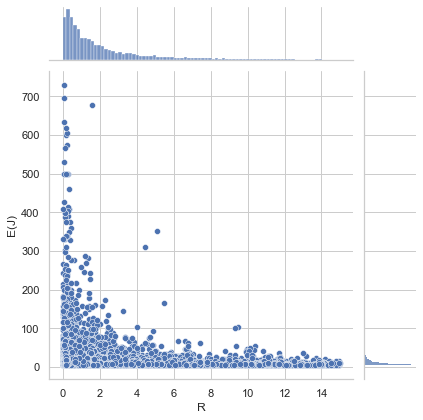

In [12]:
sns.jointplot(AllExp['R'], AllExp[AllExp['E(J)']<1000]['E(J)'], kind='scatter')

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


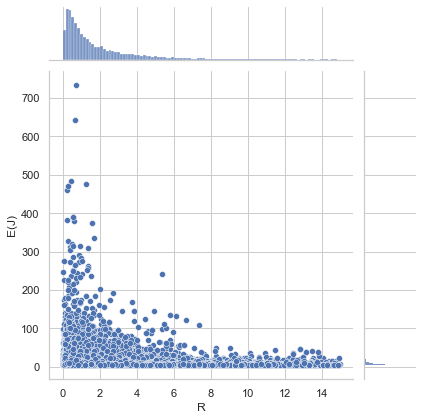

In [13]:
sns.jointplot(AllMc0['R'], AllMc0[AllMc0['E(J)']<1000]['E(J)'], kind='scatter')

4. Также можно построить графики для этих признаков (скореллированных) отдельнов эксперименте и в модели.

In [9]:
def TwoGraphics( dataS1, dataS2, Some1, Some2, title):
    
    sns.distplot(dataS1, bins = 30, kde = 0, color="green", label = f'{Some1}')
    sns.distplot(dataS2, bins = 30, kde = 0, color="orange", label = f'{Some2}')
    #Decoration
    plt.title( f"{title} {Some1} and {Some2}", fontsize=16)
    plt.legend()
    plt.show()
    
#     bins = np.linspace(-10, 10, 100)
#     plt.hist(dataS1, bins, alpha=0.5, label=f'{Some1}')
#     plt.hist(dataS2, bins, alpha=0.5, label=f'{Some2}')
#     plt.legend(loc='upper right')
#     plt.title(f"{title} {Some1} and {Some2}", fontsize=16)
#     plt.style.use('seaborn-deep')
    
#     plt.show()
#     bins = np.linspace(-10, 10, 30)
#     plt.hist([dataS1, dataS2], bins, label=[Some1, Some2])
#     plt.title(f"{title} {Some1} and {Some2}", fontsize=16)
#     plt.legend(loc='upper right')
#     plt.show()

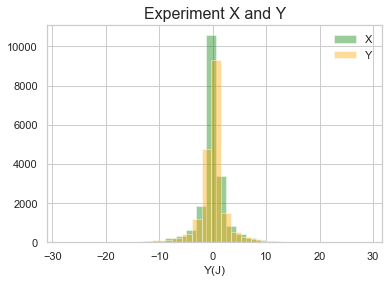

In [162]:
TwoGraphics( AllExp['X(J)'], AllExp['Y(J)'], 'X', 'Y', 'Experiment')

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


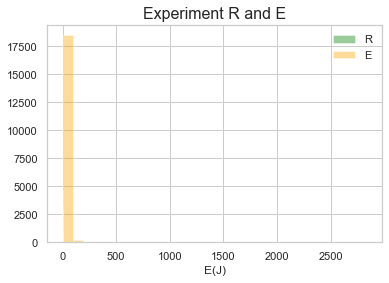

In [13]:
TwoGraphics(AllExp['R'], AllExp['E(J)'],'R', 'E', 'Experiment')

In [ ]:
TwoGraphics(AllMc0['X(J)'], AllMc0['Y(J)'],'X', 'Y', 'Model')

In [ ]:
TwoGraphics(AllMc0['R'], AllMc0['E(J)'],'R', 'E', 'Model')

5. Теперь нужно проверить однородность данных в Эксперименте и в модели.  

In [23]:
# Построение нормированных графиков
def TwoGraphics_Normalized( dataS1, dataS2, L, R, t, Some1, Some2, title, w):
    
    bins = np.linspace(L, R, 50)
    x1, bins1, p1 = plt.hist(dataS1, bins,density = True, histtype=f'{w}', alpha=0.5, label=f'{Some1}', color="green")
    x2, bins2, p2 = plt.hist(dataS2, bins, density = True, histtype=f'{w}', alpha=0.5,  label=f'{Some2}', color="orange")
    # density = True это нормировка
    #print(p1)
    t1 = p1[t].get_height()
    t2 = p1[t].get_height() - p1[t].get_height()/t
    plt.text(round(2*R/3), t1, f'mean Exp: {round(np.mean(dataS1), 3)}')
    plt.text(round(2*R/3), t2, f'mean Mc0: {round(np.mean(dataS2), 3)}')
    plt.legend(loc='upper right')
    plt.title(f"{title} {Some1} and {Some2}", fontsize=16)
    plt.style.use('seaborn-deep')
    
   
    
    plt.show()
    bins = np.linspace(L, R, 30)
    plt.hist([dataS1, dataS2], bins,density = True, label=[Some1, Some2], color = ["green" , "orange"])
    plt.title(f"{title} {Some1} and {Some2}", fontsize=16)
    plt.legend(loc='upper right')
    plt.show()

0) Координаты X и Y

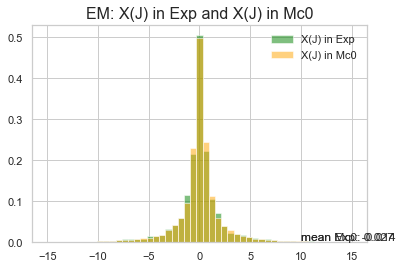

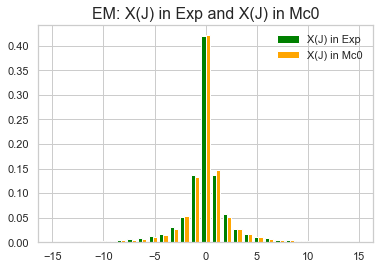

In [21]:
n = 'X(J)'
TwoGraphics_Normalized( AllExp[n], AllMc0[n], -15, 15, 10,  f'{n} in Exp', f'{n} in Mc0', 'EM:',  'barstacked')

In [21]:
#TwoGraphics_Normalized( AllExp['E(J)'], AllExp['R'], 0, 20, 5,  'E in Exp', 'R in Exp', 'EM:',  'barstacked')

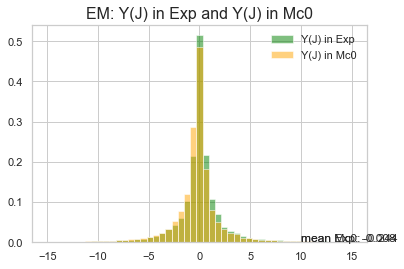

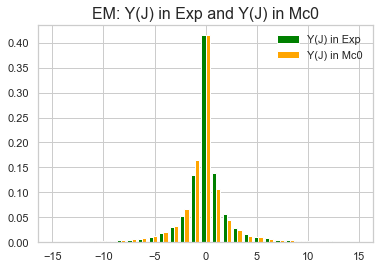

In [23]:
n = 'Y(J)'
TwoGraphics_Normalized( AllExp[n], AllMc0[n], -15, 15, 10, f'{n} in Exp', f'{n} in Mc0', 'EM:',  'barstacked')

2) 	Энергетические спектры (распределение по энергии частиц Eγ) 

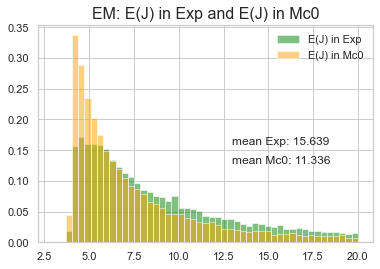

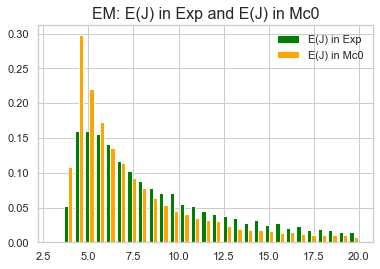

In [238]:
# Гистограмма для энергий в эксперименте и в модели.
n = 'E(J)'
TwoGraphics_Normalized( AllExp[n], AllMc0[n], 3, 20, 5, f'{n} in Exp', f'{n} in Mc0', 'EM:',  'barstacked')

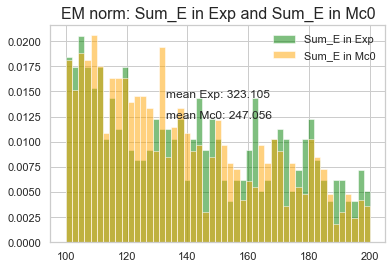

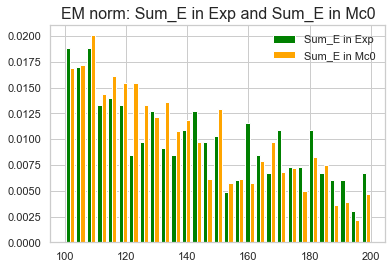

In [58]:
# Гистограмма для суммарных энергий в эксперименте и в модели.
n = 'Sum_E'
TwoGraphics_Normalized( Sum_EE, Sum_EM,100, 200, 7, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

5)	Распределение по радиусам частиц по R по новому признаку E*R

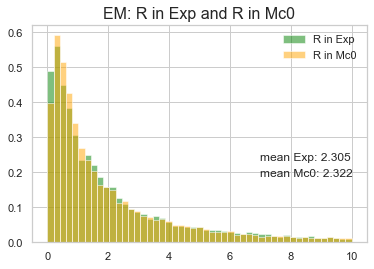

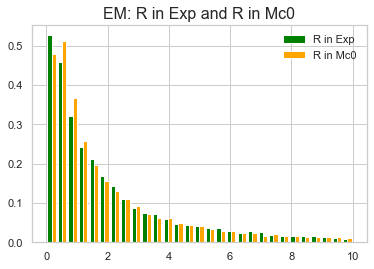

In [67]:
# Гистограмма для расстояний в эксперименте и в модели.
TwoGraphics_Normalized( AllExp['R'], AllMc0['R'],0, 10, 5, 'R in Exp', 'R in Mc0', 'EM:',  'barstacked')

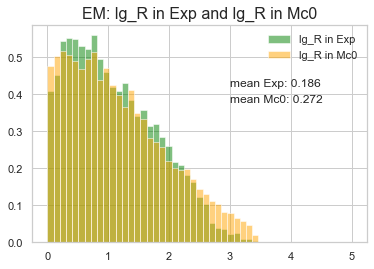

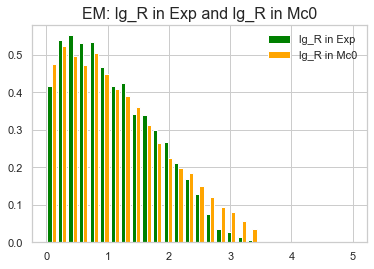

In [245]:
TwoGraphics_Normalized( np.log(AllExp['R']) , np.log(AllMc0['R']),0, 5, 10, 'lg_R in Exp', 'lg_R in Mc0', 'EM:',  'barstacked')

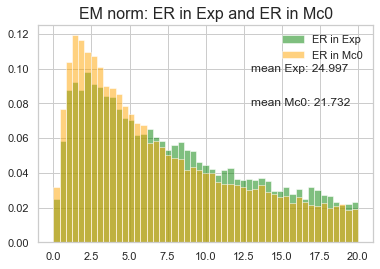

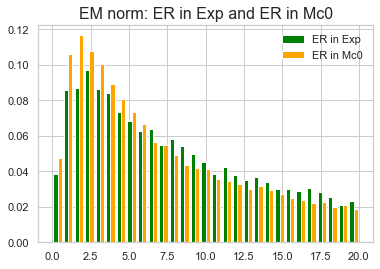

In [69]:
n = 'ER'
TwoGraphics_Normalized( AllExp[n],AllMc0[n] ,0, 20, 5, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

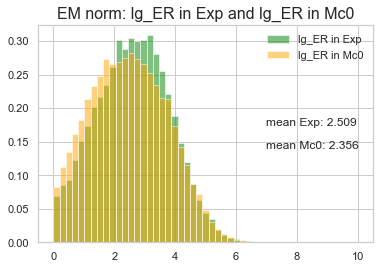

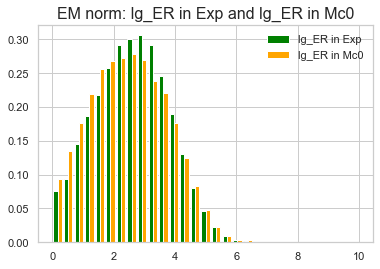

In [248]:
n = 'ER'
TwoGraphics_Normalized( np.log(AllExp[n]),np.log(AllMc0[n]),0, 10, 5,'lg_ER in Exp','lg_ER in Mc0','EM norm:','barstacked')

Создадим новый датафрейм с оставшимися признаками  
4)	Распределение по множественности   
6)	Распределение по средним радиусам семейств 

In [13]:
def New_dataFrame(data, name):
    
    Num_of_fam = []
    Sum_of_E = []
    plurality = []
    R_mean = []
    lg_R_mean = []
    ER_mean = []
    lg_ER_mean = []
    
    Num = set(data[name])

    
    for i in Num: 
        OneFamily = pandas.DataFrame( data.loc[lambda data: data[name] == i, :] ).copy()
        s = OneFamily['E(J)'].sum()
        r = OneFamily['R'].mean()
        r_lg = np.log(OneFamily['R']).mean()
        er = OneFamily['ER'].mean()
        er_lg = np.log(OneFamily['ER']).mean()
        p = len(OneFamily)
        
        Num_of_fam.append(i)
        Sum_of_E.append( s )
        R_mean.append(r)
        lg_R_mean.append(r_lg)
        ER_mean.append(er)
        lg_ER_mean.append(er_lg)
        plurality.append( p )
    
    col = [name, 'Sum_of_E', 'R_mean', 'lg_R_mean', 'ER_mean', 'lg_ER_mean', 'plurality']
    
    df = pandas.DataFrame({f'{name}': Num_of_fam, 
                           'Sum_of_E': Sum_of_E, 
                           'R_mean': R_mean,
                           'lg_R_mean': lg_R_mean,
                           'plurality': plurality,
                            'ER_mean':ER_mean,
                           'lg_ER_mean': lg_ER_mean
                          }, columns = col )
    return df

In [14]:
AllExpNew = New_dataFrame(AllExp, ' num_of_fam')
AllMc0New = New_dataFrame(AllMc0, ' num_of_family')

1) Распределение числа γ-семейств по ∑Eγ (при абсолютном пороге Ec = 4 ТэВ) и ∑E′γ (при относительном пороге fс=0.04)

In [15]:
def treshold(data, name):
    
    #thrdata = []
    new = []
    Num = set(data[name])

    
    
    for i in Num: 
        OneFamily = pandas.DataFrame( data.loc[lambda data: data[name] == i, :] ).copy()

        OneFamily['new'] = [float(0)]*len(OneFamily)
        
        s = 0.04 
        X = OneFamily['E(J)'].sort_values(ascending = False).copy()
        
        for i in range(len(X)):
            x = X[i:i+1]/(X[:i+1].sum()) 
            OneFamily['new'].at[x.index[0]] = round(list(x)[0],3) 
        
        E = round(OneFamily['E(J)'][OneFamily['new']>s].sum())
        new.append(E)
        
        #thrdata.append( OneFamily[OneFamily['new']>0.04] )
    
    return new

In [16]:
ExpE_threshold = treshold(AllExp, ' num_of_fam')
Mc0E_threshold = treshold(AllMc0, ' num_of_family')
AllExpNew['threshold'] = ExpE_threshold
AllMc0New['threshold'] = Mc0E_threshold

In [19]:
#AllExpNew.to_csv('AllExp_New1')
#AllMc0New.to_csv('AllMc0_New1')

In [29]:
AllExpNew = pandas.read_csv('AllExp_New1')
AllMc0New = pandas.read_csv('AllMc0_New1')

In [30]:
AllExpNew[:10]

,Unnamed: 0,num_of_fam,Sum_of_E,R_mean,lg_R_mean,ER_mean,lg_ER_mean,plurality,threshold
0,0,1,145.800,1.025121,-0.002382,12.896953,2.237456,13,137
1,1,2,200.964,1.113121,-0.137125,12.534493,2.367062,13,187
2,2,3,642.961,1.696953,-0.008496,19.468334,2.383997,34,428
3,3,4,117.368,4.342415,1.340892,29.669540,3.216201,17,105
4,4,5,200.957,2.246727,0.318488,16.972735,2.524188,17,165
5,5,6,574.699,0.551259,-0.944078,6.926019,1.417283,34,401
6,6,7,242.174,0.089868,-2.813249,0.800383,-0.304905,13,201
7,7,8,213.751,2.361166,0.400860,27.487014,2.650268,18,172
8,8,9,114.183,0.312872,-1.802302,1.893027,0.243294,14,110
9,9,10,437.431,0.247827,-1.606736,2.780465,0.895925,31,308


In [17]:
AllExpNew[:10]

,num_of_fam,Sum_of_E,R_mean,lg_R_mean,ER_mean,lg_ER_mean,plurality,threshold
0,1,145.800,1.025121,-0.002382,12.896953,2.237456,13,137
1,2,200.964,1.113121,-0.137125,12.534493,2.367062,13,187
2,3,642.961,1.696953,-0.008496,19.468334,2.383997,34,428
3,4,117.368,4.342415,1.340892,29.669540,3.216201,17,105
4,5,200.957,2.246727,0.318488,16.972735,2.524188,17,165
5,6,574.699,0.551259,-0.944078,6.926019,1.417283,34,401
6,7,242.174,0.089868,-2.813249,0.800383,-0.304905,13,201
7,8,213.751,2.361166,0.400860,27.487014,2.650268,18,172
8,9,114.183,0.312872,-1.802302,1.893027,0.243294,14,110
9,10,437.431,0.247827,-1.606736,2.780465,0.895925,31,308


Сделали датафрейм с этими признаками, теперь им всем можно построить графики

In [223]:
# Суммарная энергия
#n = 'Sum_of_E'
#TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,0, 1000, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

In [91]:
AllExpNew[(AllExpNew['Sum_of_E']>200) & (AllExpNew['Sum_of_E']<400)][n]

,Unnamed: 0,num_of_fam,Sum_of_E,R_mean,lg_R_mean,ER_mean,lg_ER_mean,plurality,threshold
1,1,2,200.964,1.113121,-0.137125,12.534493,2.367062,13,187
4,4,5,200.957,2.246727,0.318488,16.972735,2.524188,17,165
6,6,7,242.174,0.089868,-2.813249,0.800383,-0.304905,13,201
7,7,8,213.751,2.361166,0.400860,27.487014,2.650268,18,172
11,11,12,281.302,0.674278,-0.793324,6.231825,1.380672,26,196
...,...,...,...,...,...,...,...,...,...
887,887,895,372.557,0.993085,-0.148366,26.062476,3.010279,14,358
888,888,896,271.471,0.769074,-0.750295,6.910268,1.394125,28,189
889,889,897,243.124,3.586341,0.887946,38.078079,3.377161,14,200
894,894,902,294.378,1.894106,-0.019134,36.029114,3.013079,7,277


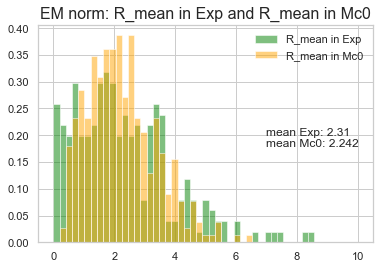

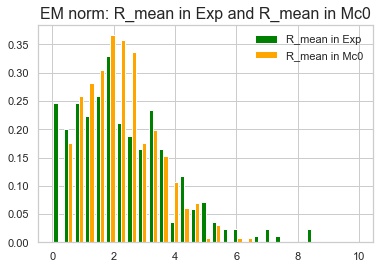

In [100]:
n = 'R_mean'
#AllExpNew[n][AllExpNew['Sum_of_E']<200]
TwoGraphics_Normalized(AllExpNew[(AllExpNew['Sum_of_E']>200)&(AllExpNew['Sum_of_E']<400)][n],AllMc0New[(AllMc0New['Sum_of_E']>200)&(AllMc0New['Sum_of_E']<400)][n] ,0, 10,10,  f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

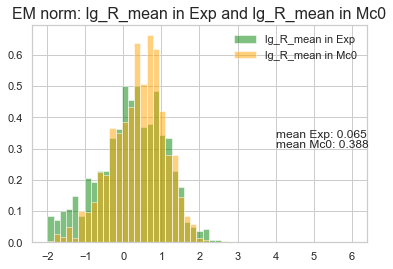

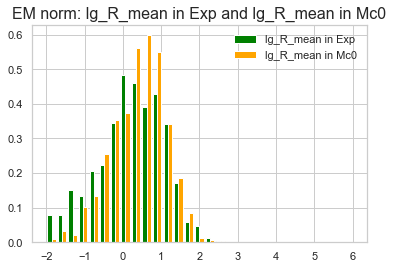

In [102]:
n = 'lg_R_mean'
TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,-2, 6, 10, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

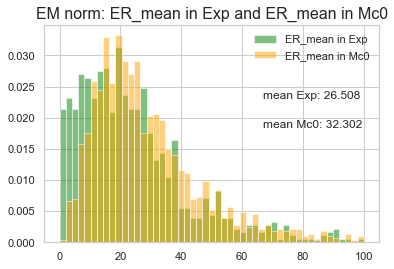

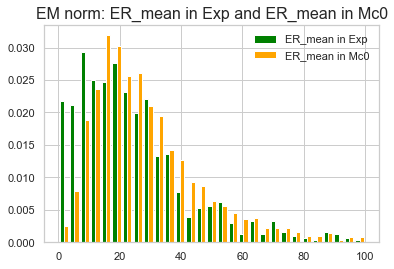

In [251]:
n = 'ER_mean'
TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,0, 100,5, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

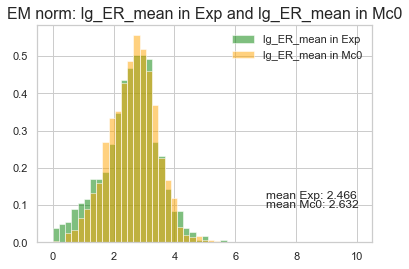

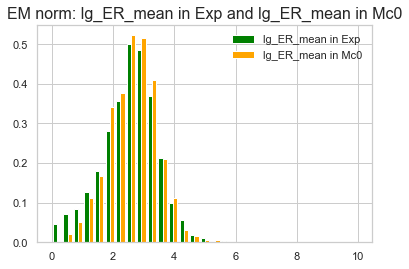

In [252]:
n = 'lg_ER_mean'
TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,0, 10,5, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

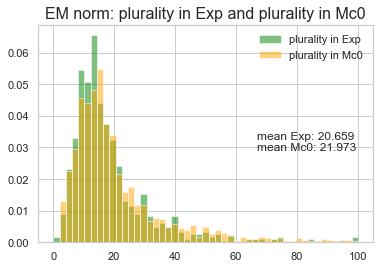

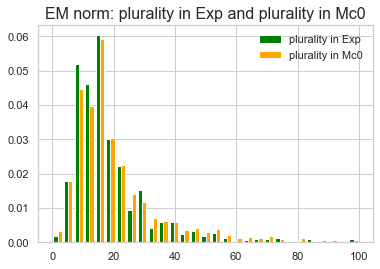

In [72]:
n = 'plurality'
TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,0, 100, 9, f'{n} in Exp', f'{n} in Mc0', 'EM norm:',  'barstacked')

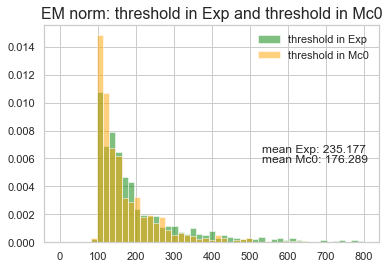

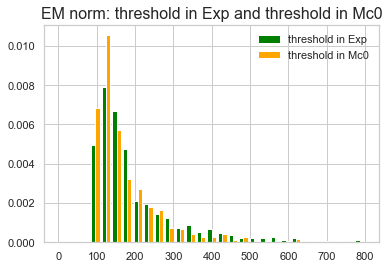

In [259]:
# Порог энергии
n = 'threshold'
TwoGraphics_Normalized(AllExpNew[n],AllMc0New[n] ,0, 800, 9, f'{n} in Exp', f'{n} in Mc0', 'EM norm:','barstacked')

8. Рассмотрим новое распределение взаимных расстояний

In [20]:
# Функция вычисления матрицы расстояния для одного датафрейма, возвращает датафрейм расстояний
# Можно выбрать коэффициент домножения
def Matrix_of_Distance(X_coordinate, Y_coordinate, particle_energy):
    Distance =[]
    for i in range(len(X_coordinate)):
        Distance.append([])
        for j in range(len(Y_coordinate)):
            #Coef=( math.sqrt(particle_energy[i]*particle_energy[j]) )/ sum(particle_energy)
            Coef = math.sqrt(particle_energy[i]*particle_energy[j]) 
            r = math.sqrt( math.pow((X_coordinate[i]-X_coordinate[j]),2) + math.pow((Y_coordinate[i]-Y_coordinate[j]),2) )
            r=r*Coef
            Distance[i].append(r)
    
    return pandas.DataFrame(Distance)

In [21]:
from scipy.spatial import distance_matrix

def NewR(data, name):
    
    #thrdata = []
    new = []
    Num = set(data[name])

    
    for i in Num: 
        OneFamily = pandas.DataFrame( data.loc[lambda data: data[name] == i, :] ).copy()
        q = (OneFamily[['X(J)', 'Y(J)']].values)
        
        df = pandas.DataFrame(distance_matrix(q, q))
        i, j = np.indices(df.shape)
        tmp = list(df.values[~(i <= j)] )
        
        new = new + tmp
    
    return new

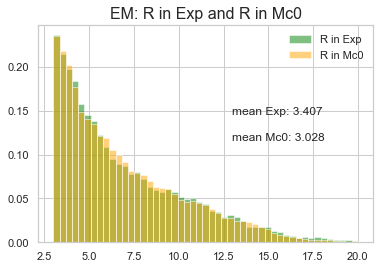

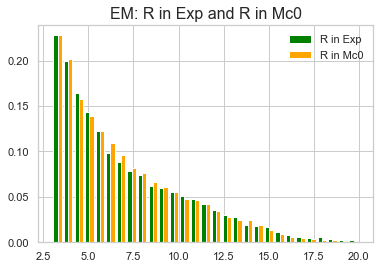

In [24]:
ExpR = NewR(AllExp, ' num_of_fam')
Mc0R = NewR(AllMc0, ' num_of_family')
n = 'R'
TwoGraphics_Normalized( ExpR, Mc0R, 3, 20, 5, f'{n} in Exp', f'{n} in Mc0', 'EM:',  'barstacked')

In [ ]:
interval = ''
Calculate_csv(ExpR, Mc0R, 'R', interval)

9. Критерий Колмогорова-Смирнова через гистограмму  
для alpha = 0.05, 1 - alpha = 0.95, y_0.95 = 1,36

In [25]:
def KS(dataS1, dataS2, Some, bins): 
    n1 = len(dataS1)
    n2 = len(dataS2)
    #print(n1)
    #print(n2)
    AllE = np.array(dataS1)
    AllM = np.array(dataS2)
    AllE = np.sort(AllE)
    AllM = np.sort(AllM)
    
    #bins = 100
    Max_len = max(max(AllE), max(AllM))
    STEP = Max_len/bins
    
    valuesE = np.array([0]*100)
    valuesM = np.array([0]*100)
    intervals = np.array([0])
    s = 0
    sup = -1
    
    for i in range(bins):
        s = s + STEP
        intervals = np.append(intervals, s)
        valuesE[i] = ( (AllE>(s-STEP)*1)*(AllE<s)*1).sum()
        valuesM[i] = ( (AllM>(s-STEP)*1)*(AllM<s)*1).sum()
        #valuesE[i] = ( (AllE<s)*1).sum()
        #valuesM[i] = ( (AllM<s)*1).sum()
        if abs(valuesE[i] - valuesM[i]) > sup:
            sup = abs(valuesE[i]/n1 - valuesM[i]/n2)
            
    #print(f'{Some}, statistic K = ', np.sqrt(n1*n2/(n1+n2))*sup)
    #print(f'{Some}, statistic D = ', sup)
    #print(f'{Some}, value C =  ', np.sqrt((n1+n2)/(n1*n2))*1.36 )
    return sup, np.sqrt((n1+n2)/(n1*n2))*1.36

In [26]:
# Первое число - значение статистики, второе - значение С альфа, критическое значение
# Если статистика < С альфа выборки однородные
print(KS(AllExp['R'], AllMc0['R'], 'R', 100))
print(KS(AllExp['E(J)'], AllMc0['E(J)'], 'E(J)', 100))

(0.00016979967503019357, 0.012639877844365358)
(5.36135535063264e-05, 0.012639877844365358)


In [27]:
# Встроенная функция критерия Колмогорова, где считается эмпирическая функция распределение и р значение
# alpha = 0.0001
# Односторонний
print(stats.ks_2samp(AllExp['R'],AllMc0['R'], alternative='less'))
print(stats.kstest(AllExp['R'],AllMc0['R'], alternative='less'))
# Двусторонний
print(stats.kstest(AllExp['E(J)'],AllMc0['E(J)']))
# Односторонний
print(stats.kstest(AllExp['E(J)'],AllMc0['E(J)'], alternative='greater'))

KstestResult(statistic=0.020447724466527595, pvalue=6.130678494542418e-05)
KstestResult(statistic=0.020447724466527595, pvalue=6.130678494542418e-05)
KstestResult(statistic=0.1638942088649133, pvalue=3.269687633901798e-272)
KstestResult(statistic=0.0001072271070126528, pvalue=0.9996352518842321)


In [ ]:
# Эмпирическая функция распреления
ecdfE = ECDF(AllExp['R'])
ecdfM = ECDF(AllMc0['R'])
plt.plot(ecdfE.x, ecdfE.y, label='exp')
plt.plot(ecdfM.x, ecdfM.y, label='model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
ecdfE = ECDF(AllExp['E(J)'])
ecdfM = ECDF(AllMc0['E(J)'])
plt.plot(ecdfE.x, ecdfE.y, label='exp')
plt.plot(ecdfM.x, ecdfM.y, label='model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Какой-то другой критерий.
stats.epps_singleton_2samp(AllExp['R'],AllMc0['R'])
stats.epps_singleton_2samp(AllExp['E(J)'],AllMc0['E(J)'])

9. Подсчет среднего, дисперсии, ассиметрии, эксцесса.

In [28]:
from scipy.stats import kurtosis
from scipy.stats import skew
import random

# Теперь сравним распределения в модели и в эксперименте
#  Средние, дисперсии (var), ассиметрия (skew) эксцесс(kurtosis)
def Calculate_csv (dataS1, dataS2, Some, interval):
    col_new = ['Name', 'mean', 'var', 'skew', 'kurtosis', 'sampling error', 'relative error', 
               'stat D and C_alpha', 't-test st p-value' ]
    
    x, y = KS(dataS1, dataS2, Some, 100)
    n1 = len(dataS1)
    n2 = len(dataS2)
    #x = stats.kstest(dataS1,dataS2, alternative='less')[0]
    #y = np.sqrt((n1+n2)/(n1*n2))*1.36
    #y = np.sqrt((n1+n2)/(n1*n2))*1.95
    st, p = stats.ttest_ind(dataS1, dataS2)
    
    Exp = [f'{Some} Exp in {interval}', 
           round(np.mean(dataS1), 3), 
           round(np.var(dataS1), 3), 
           round(skew(dataS1), 3), 
           round(kurtosis(dataS1), 3),
           round(np.abs(np.sqrt(np.var(dataS1)/len(dataS1)) ),3),
           round(np.abs((np.mean(dataS1) - np.mean(dataS2) ) /np.mean(dataS2)), 3),
           round(x, 3),
           round(st, 5)
          ] 
    
    Mc0 = [f'{Some} Mc0 in {interval}', 
           round(np.mean(dataS2), 3), 
           round(np.var(dataS2), 3), 
           round(skew(dataS2), 3), 
           round(kurtosis(dataS2), 3),
           round(np.abs(np.sqrt(np.var(dataS2)/len(dataS2) )),3),
           round(np.abs((np.mean(dataS2) - np.mean(dataS1))/np.mean(dataS1)), 3),
           round(y, 3),
           round(p, 5)
          ]
    
    data = [Exp, Mc0]
    
    
    df = pandas.DataFrame(data, columns = col_new)
    return df
    
    
def Choice(dataS, left, right):
    if right == None:
        d = dataS.loc[ dataS['Sum_of_E'] > left ].copy()
    else:
        d = dataS.loc[ (dataS['Sum_of_E'] >=left) & (dataS['Sum_of_E'] <= right)].copy() 
    return d

def Cal_S(dataS1, dataS2, L, R, col):
    if R == None:
        #print(f'Sum_E > 700')
        interval = f'( >{L})'
    else:      
        #print(f'{L} < Sum_E < {R}')
        interval = f'({L}, {R})'
        
    #print()
    x = Choice(dataS1, L, R)
    y = Choice(dataS2, L, R)
    
    col_new = ['Name', 'mean', 'var', 'skew', 'kurtosis', 'sampling error', 'relative error', 
               'stat D and C_alpha', 't-test st p-value' ]
    df_col = pandas.DataFrame(columns = col_new)
    
    data_new = []
    #data_new.append(df_col)
    for u in col:
        df_new = Calculate_csv(x[u], y[u], u, interval)
        data_new.append(df_new)
        #df_col = df_col.join(df_new)

    return pandas.concat(data_new)
    #return df_col

In [32]:
def R_datafr(R, L):
    if R == None:
        interval = f'( >{L})'
    else:      
        interval = f'({L}, {R})'
    E = NewR(Choice(AllExp, 100, 200), ' num_of_fam')
    M = NewR(Choice(AllMc0, 100, 200), ' num_of_family')
    dfR = Calculate_csv(E, M, 'R_two', interval)
    return dfR    

In [30]:
columns = list(AllExp)[2:]
columns.remove('Sum_of_E')
d1 = Cal_S(AllExp, AllMc0, 100, 200, columns)
d2 = Cal_S(AllExp, AllMc0, 200, 400, columns)
d3 = Cal_S(AllExp, AllMc0, 400, 700, columns)
d4 = Cal_S(AllExp, AllMc0, 700, None, columns)
d5 = Cal_S(AllExp, AllMc0, 100, None, columns)

In [33]:
dfR1 = R_datafr(200, 100)
dfR2 = R_datafr(200, 400)
dfR3 = R_datafr(400, 700)
dfR4 = R_datafr(700, None)
dfR5 = R_datafr(100, None)

In [26]:
columns
list(AllExpNew)[1:]

[' num_of_fam',
 'Sum_of_E',
 'R_mean',
 'lg_R_mean',
 'ER_mean',
 'lg_ER_mean',
 'plurality',
 'threshold']

In [ ]:
AllExpNew = pandas.read_csv('AllExp_New1')
AllMc0New = pandas.read_csv('AllMc0_New1')

In [35]:
columns = list(AllExpNew)[2:]
dd1 = Cal_S(AllExpNew, AllMc0New, 100, 200, columns)
dd2 = Cal_S(AllExpNew, AllMc0New, 200, 400, columns)
dd3 = Cal_S(AllExpNew, AllMc0New, 400, 700, columns)
dd4 = Cal_S(AllExpNew, AllMc0New, 700, None, columns)
dd5 = Cal_S(AllExpNew, AllMc0New, 100, None, columns)

In [36]:
part1 = pandas.concat([d1, dd1, dfR1])
part2 = pandas.concat([d2, dd2, dfR2])
part3 = pandas.concat([d3, dd3, dfR3])
part4 = pandas.concat([d4, dd4, dfR4])
part5 = pandas.concat([d5, dd5, dfR5])

In [38]:
#import XlsxWriter
writer = pandas.ExcelWriter('example.xlsx', engine='xlsxwriter')
part1.to_excel(writer, '100-200')
part2.to_excel(writer, '200-400')
part3.to_excel(writer, '400-700')
part4.to_excel(writer, '>700')
part5.to_excel(writer, '>100')
writer.save()

10. Поиск отличий

In [18]:
len(AllExp[(AllExp['Sum_of_E']>100)&(AllExp['Sum_of_E']<200)])

5847

In [19]:
len(AllExp[(AllExp['Sum_of_E']>200)&(AllExp['Sum_of_E']<400)])

4887

In [20]:
len(AllExp[(AllExp['Sum_of_E']>400)&(AllExp['Sum_of_E']<700)])

3387

In [21]:
len(AllExp[(AllExp['Sum_of_E']>700)])

4531

In [22]:
len(AllExp[(AllExp['Sum_of_E']>100)])

18652

In [25]:
#AllExp[AllExp[' num_of_fam']==1]

,num_of_fam,j,X(J),Y(J),E(J),R,Sum_of_E
0,1,1,0.251300,-1.037000,20.896,1.067015,145.8
1,1,2,0.600300,-0.548200,13.749,0.812947,145.8
2,1,3,0.308100,-1.063100,11.535,1.106846,145.8
3,1,4,0.661800,-0.570400,6.129,0.873691,145.8
4,1,5,0.584300,-0.561100,8.619,0.810086,145.8
5,1,6,0.260873,-1.045526,18.888,1.077580,145.8
6,1,7,0.604300,-0.561500,8.662,0.824900,145.8
7,1,8,0.316900,-1.030000,7.172,1.077648,145.8
8,1,9,0.645300,-0.527500,4.324,0.833468,145.8
9,1,10,0.619300,-0.548500,6.601,0.827275,145.8


In [ ]:
AllExpNew = pandas.read_csv('AllExp_New1')
AllMc0New = pandas.read_csv('AllMc0_New1')

In [34]:
AllExpNew[(AllExpNew['Sum_of_E']>100)&(AllExpNew['Sum_of_E']<200)][:10]

,Unnamed: 0,num_of_fam,Sum_of_E,R_mean,lg_R_mean,ER_mean,lg_ER_mean,plurality,threshold
0,0,1,145.800,1.025121,-0.002382,12.896953,2.237456,13,137
3,3,4,117.368,4.342415,1.340892,29.669540,3.216201,17,105
8,8,9,114.183,0.312872,-1.802302,1.893027,0.243294,14,110
13,13,14,150.749,2.209769,0.534389,34.523981,3.089728,10,141
15,15,16,196.387,2.563314,0.725663,23.165206,2.879444,20,154
17,17,18,141.554,1.386263,-0.064551,11.794527,1.876398,19,119
19,19,20,124.252,2.442314,0.679323,21.008746,2.716662,15,115
23,23,24,144.251,4.070116,1.300269,31.988640,3.338630,17,131
26,26,27,196.995,3.434671,1.039011,40.941967,3.365213,16,170
28,28,29,106.538,2.412384,0.879796,36.744572,3.221491,7,107


In [48]:
# ppart1 = AllExpNew[(AllExpNew['Sum_of_E']>=100)&(AllExpNew['Sum_of_E']<200)].copy()
# print(len(ppart1))
# ppart2 = AllExpNew[(AllExpNew['Sum_of_E']>=200)&(AllExpNew['Sum_of_E']<400)]
# print(len(ppart2))
# ppart3 = AllExpNew[(AllExpNew['Sum_of_E']>=400)&(AllExpNew['Sum_of_E']<700)]
# print(len(ppart3))
# ppart4 = AllExpNew[(AllExpNew['Sum_of_E']>=700)]
# print(len(ppart4))
# ppart5 = AllExpNew[(AllExpNew['Sum_of_E']>=100)]
# print(len(ppart5))
ppart1 = AllExp[(AllExp['Sum_of_E']>=100)&(AllExp['Sum_of_E']<200)].copy()
print(len(ppart1))
ppart2 = AllExp[(AllExp['Sum_of_E']>=200)&(AllExp['Sum_of_E']<400)]
print(len(ppart2))
ppart3 = AllExp[(AllExp['Sum_of_E']>=400)&(AllExp['Sum_of_E']<700)]
print(len(ppart3))
ppart4 = AllExp[(AllExp['Sum_of_E']>=700)]
print(len(ppart4))
ppart5 = AllExp[(AllExp['Sum_of_E']>=100)]
print(len(ppart5))

5847
4887
3387
4531
18652


In [49]:
writer = pandas.ExcelWriter('family/AllExp.xlsx', engine='xlsxwriter')
ppart1.to_excel(writer, '100-200')
ppart2.to_excel(writer, '200-400')
ppart3.to_excel(writer, '400-700')
ppart4.to_excel(writer, '>700')
ppart5.to_excel(writer, '>100')
writer.save()

In [46]:
# ppart1 = AllMc0New[(AllMc0New['Sum_of_E']>=100)&(AllMc0New['Sum_of_E']<200)].copy()
# print(len(ppart1))
# ppart2 = AllMc0New[(AllMc0New['Sum_of_E']>=200)&(AllMc0New['Sum_of_E']<400)]
# print(len(ppart2))
# ppart3 = AllMc0New[(AllMc0New['Sum_of_E']>=400)&(AllMc0New['Sum_of_E']<700)]
# print(len(ppart3))
# ppart4 = AllMc0New[(AllMc0New['Sum_of_E']>=700)]
# print(len(ppart4))
# ppart5 = AllMc0New[(AllMc0New['Sum_of_E']>=100)]
# print(len(ppart5))
ppart1 = AllMc0[(AllMc0['Sum_of_E']>=100)&(AllMc0['Sum_of_E']<200)].copy()
print(len(ppart1))
ppart2 = AllMc0[(AllMc0['Sum_of_E']>=200)&(AllMc0['Sum_of_E']<400)]
print(len(ppart2))
ppart3 = AllMc0[(AllMc0['Sum_of_E']>=400)&(AllMc0['Sum_of_E']<700)]
print(len(ppart3))
ppart4 = AllMc0[(AllMc0['Sum_of_E']>=700)]
print(len(ppart4))
ppart5 = AllMc0[(AllMc0['Sum_of_E']>=100)]
print(len(ppart5))

10534
8712
6278
4996
30520


In [96]:
#AllExpNew[(AllExpNew['Sum_of_E']>200)&(AllExpNew['Sum_of_E']<400)]

In [110]:
#AllMc0New[(AllMc0New['Sum_of_E']>200)&(AllMc0New['Sum_of_E']<400)]

In [41]:
# Теперь поищем корреляцию (линейную) межу X Y для 4рех самых энергитичных частиц в семействах ЭКСПЕРИМЕНТА

def LinearCorrelationParticle(dataS1, dataS2, Some1, Some2):
    alpha = 0.05
    if (len(dataS1) < 2):
        return False
    stat, p = stats.pearsonr(dataS1, dataS2)
    #print('Pearsonr correlation = %.3f, p = %.3f' % (stat, p))
    
    if p > alpha:
        #print('Нет корреляции')
        return 0
    else:
        #print('Есть корреляция')
        #sns.jointplot(dataS1, dataS2, kind='scatter')
        #if stat < 0:
        #    print (f'С увеличением {Some1} уменьшается {Some2}')
        #else:
        #    print (f'С увеличением {Some1} увеличивается {Some2}')
        return stat

In [42]:
def Four_Points(name, dataS, dataSum):
    
    N_num = dataS[name][len(dataS)-1] # Число пленок.
    List_of_Max_Frames = []
    List_of_num_fam = []
    List_of_inform = []
    
    for i in range(1, N_num+1): 
        OneFamily = pandas.DataFrame( dataS.loc[lambda dataS: dataS[name] == i, :] ).copy()
        
        if len(OneFamily)>=4:
            d = 4
        else:
            d = len(OneFamily)
        
        FourMax = []
        
        for k in range(d):
            OneFamilyMax =  dataS.iloc[OneFamily['E(J)'].idxmax()].values
            FourMax.append(OneFamilyMax)
            OneFamily = OneFamily.drop(  OneFamily['E(J)'].idxmax() ) 
        
        FourMaxData = pandas.DataFrame(data = FourMax, columns = dataS.columns)
        
        cor = LinearCorrelationParticle(FourMaxData['X(J)'], FourMaxData['Y(J)'], 'X(J)', 'Y(J)')
        
        if (cor != 0 ):
            index = 1
            if (cor >=  0.99 ):
                index = 9
        else:
            index = 0
        List_of_inform.append([i, index, round(dataSum[i-1],3), round(cor,3)])
        List_of_num_fam.append(i)
        List_of_Max_Frames.append(FourMaxData)
    
    New_Frame = pandas.DataFrame(data = List_of_inform, columns = [name, 'index', 'Sum_EE', 'cor' ])
    return New_Frame, List_of_Max_Frames 
# 100-200 200-400 400-700 >700 доля для кот >0.99

In [367]:
#sns.jointplot(List_of_Max_Frames[5]['X(J)'], List_of_Max_Frames[5]['Y(J)'], kind='scatter')
#sns.jointplot(List_of_Max_Frames[5]['X(J)'], List_of_Max_Frames[5]['Y(J)'], kind='reg')
#stats.pearsonr(List_of_Max_Frames[5]['X(J)'], List_of_Max_Frames[5]['Y(J)'])
#Sum_EE[5]

In [43]:
W, R = Four_Points(' num_of_fam', AllExp, Sum_EE)

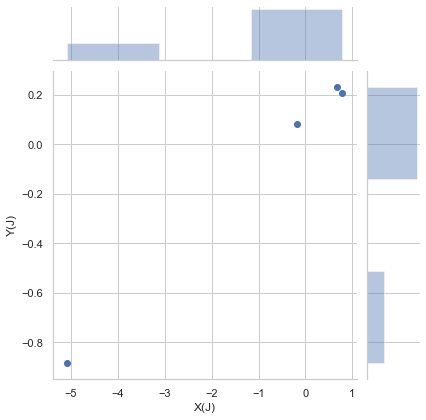

In [44]:
sns.jointplot(R[17]['X(J)'], R[17]['Y(J)'], kind='scatter')

In [45]:
W.loc[ (W['index'] > 0)].head(10)

,num_of_fam,index,Sum_EE,cor
3,4,1,117.368,-0.990
4,5,9,200.957,0.999
7,8,1,220.646,-1.000
11,12,1,281.302,-0.977
15,16,9,196.387,0.999
17,18,9,141.554,0.999
26,27,9,196.995,1.000
27,28,1,207.773,0.961
30,31,1,101.447,-0.999
34,35,1,205.542,-0.999


In [46]:
X = W.loc[ (W['index'] ==9) & (W['Sum_EE'] >=100) & (W['Sum_EE'] <= 200)]
len(X)

55

In [47]:
X = W.loc[ (W['index'] ==9) & (W['Sum_EE'] >=200) & (W['Sum_EE'] <= 400)]
len(X)

23

In [48]:
X = W.loc[ (W['index'] ==9) & (W['Sum_EE'] >=400) & (W['Sum_EE'] <= 700)]
len(X)

18

In [49]:
X = W.loc[ (W['index'] ==9) & (W['Sum_EE'] >=700)]
len(X)

3

In [ ]:
W1, R1 = Four_Points(' num_of_family', AllMc0, Sum_EM)